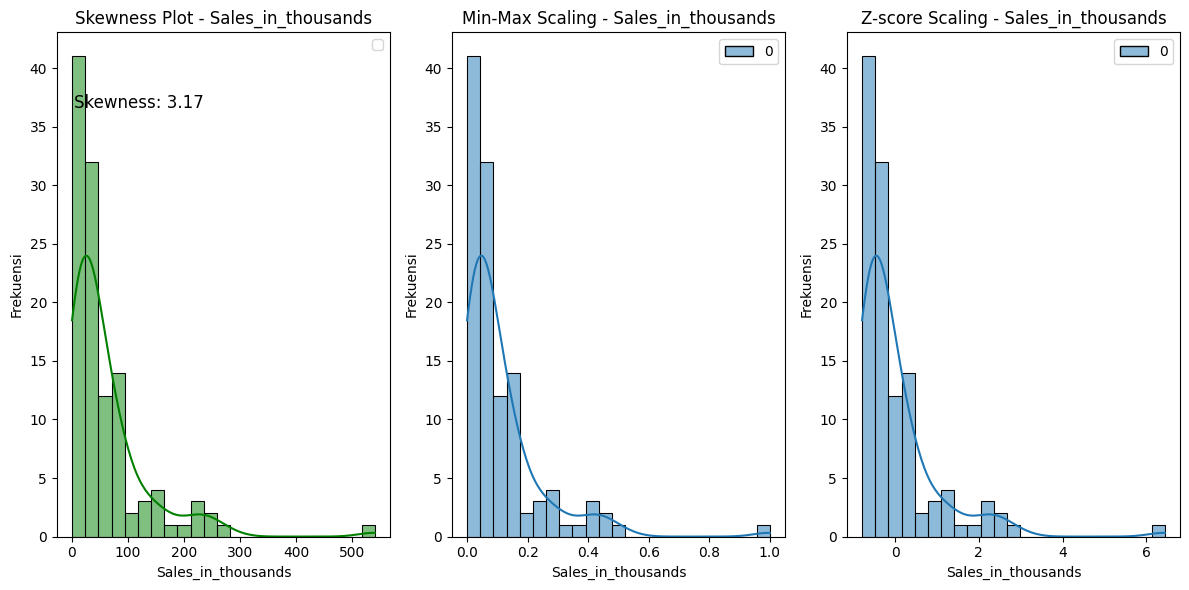

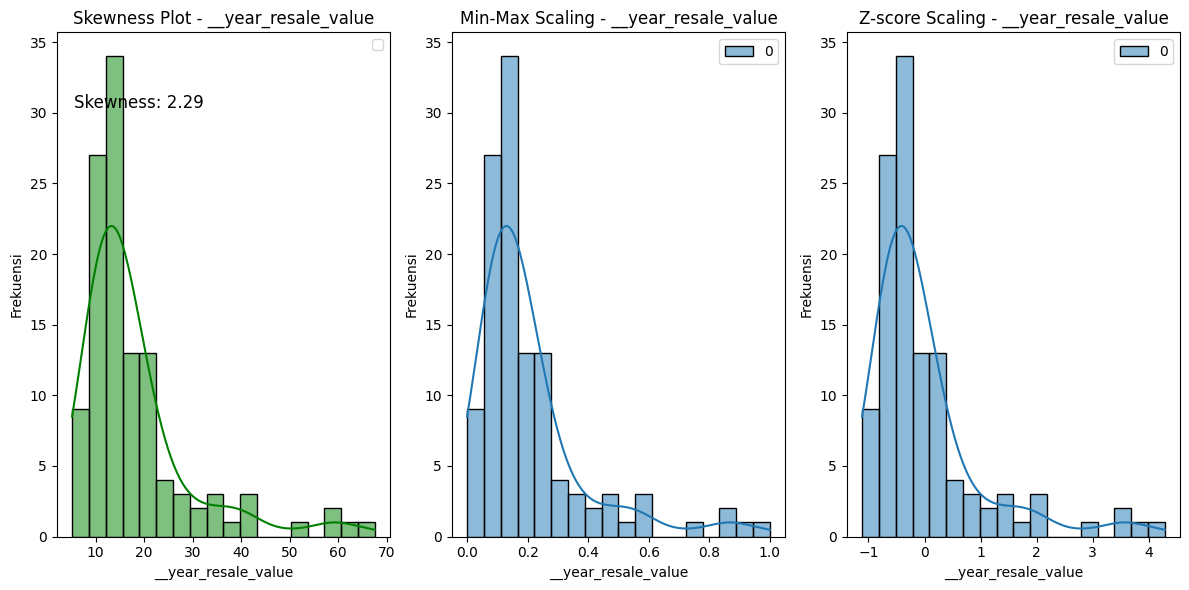

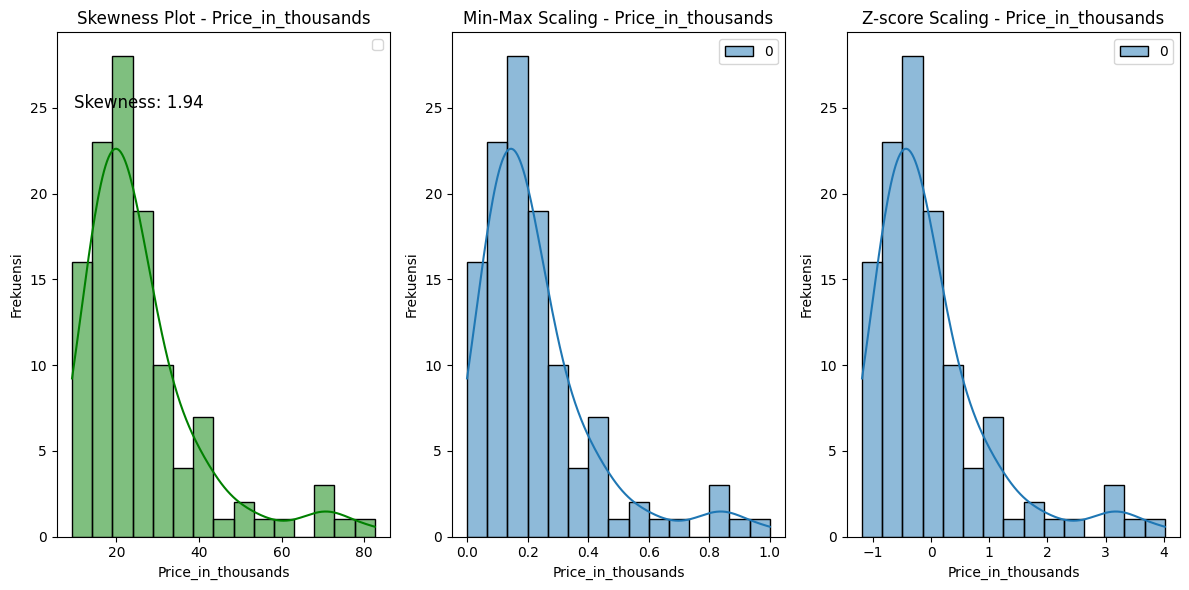

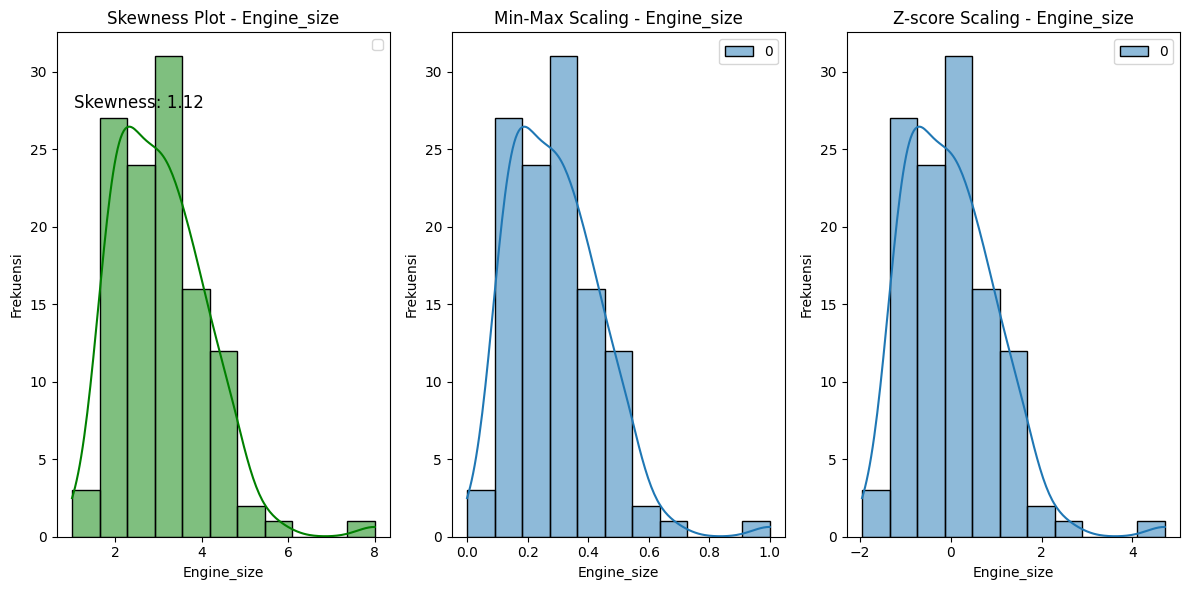

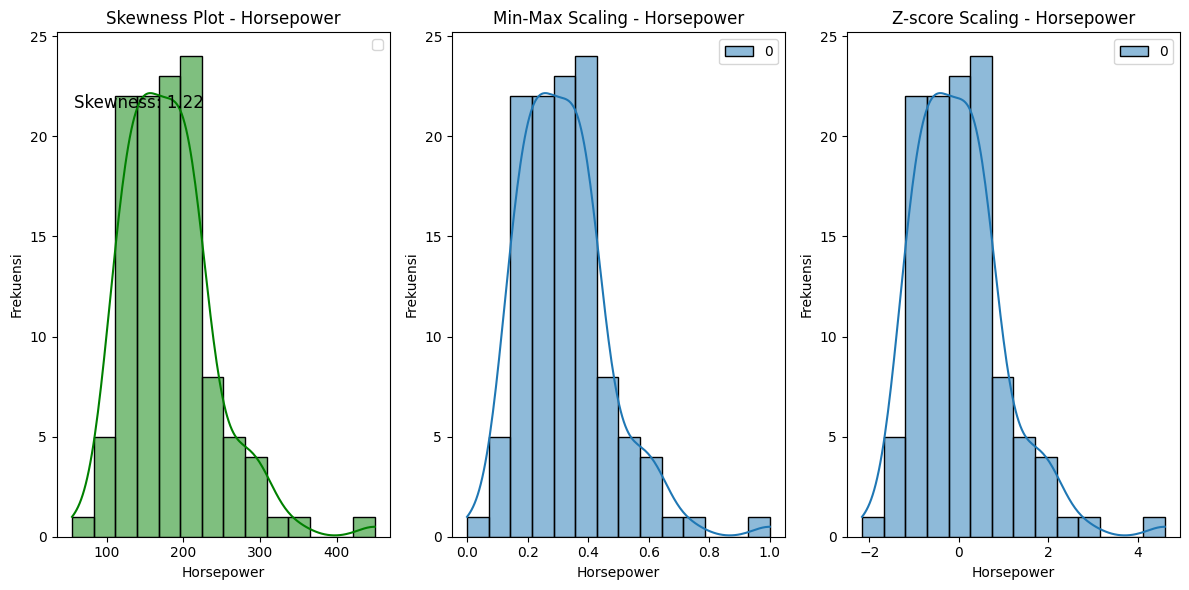

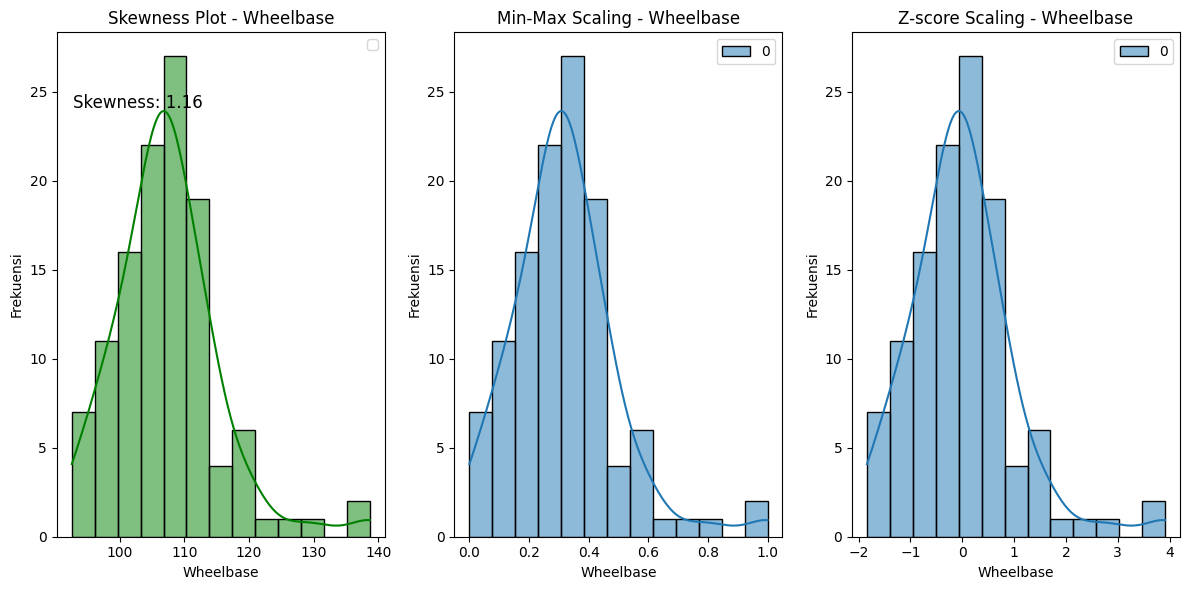

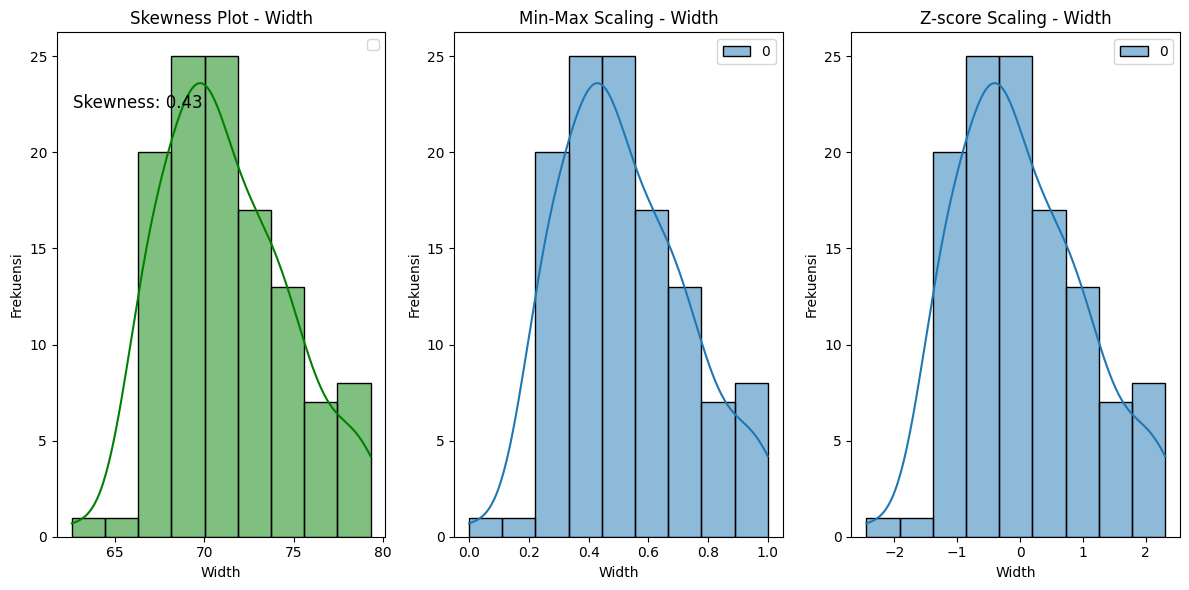

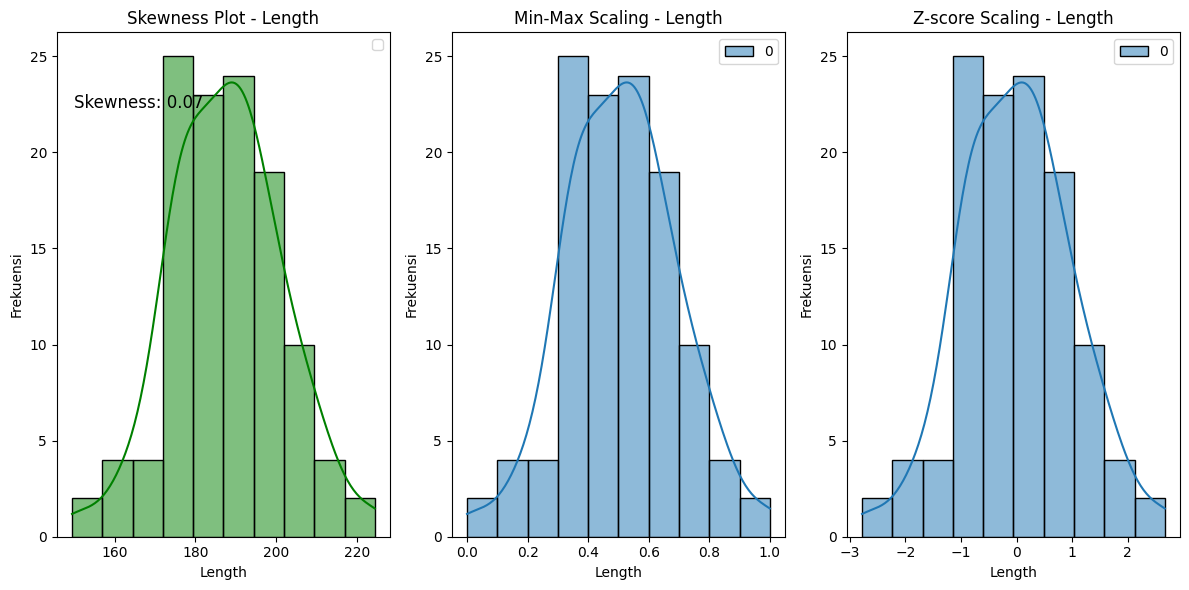

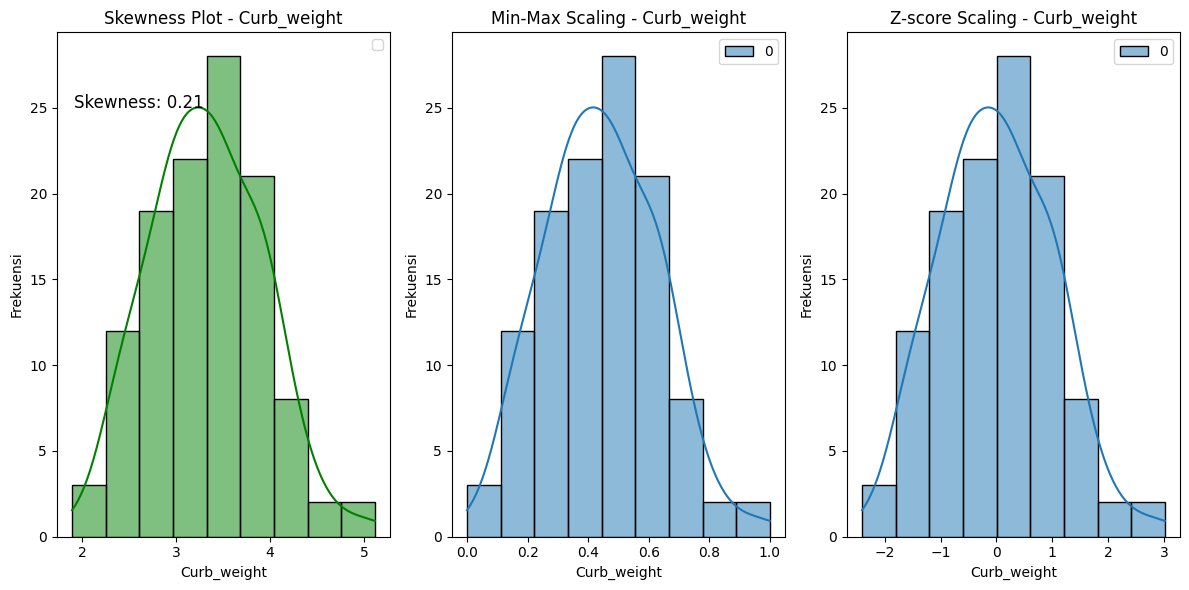

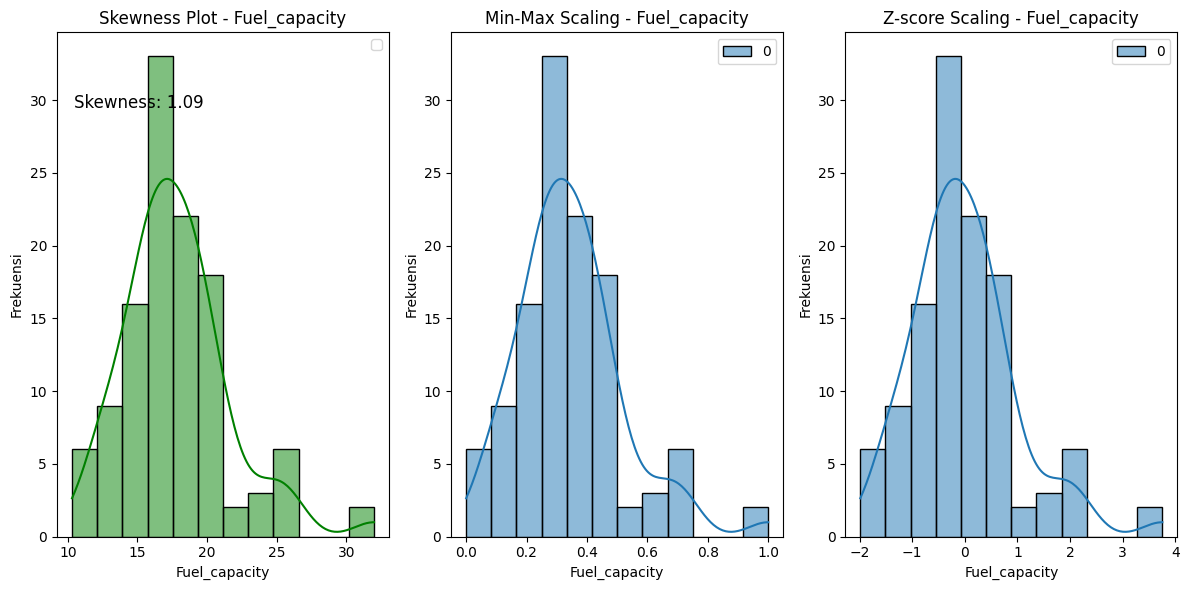

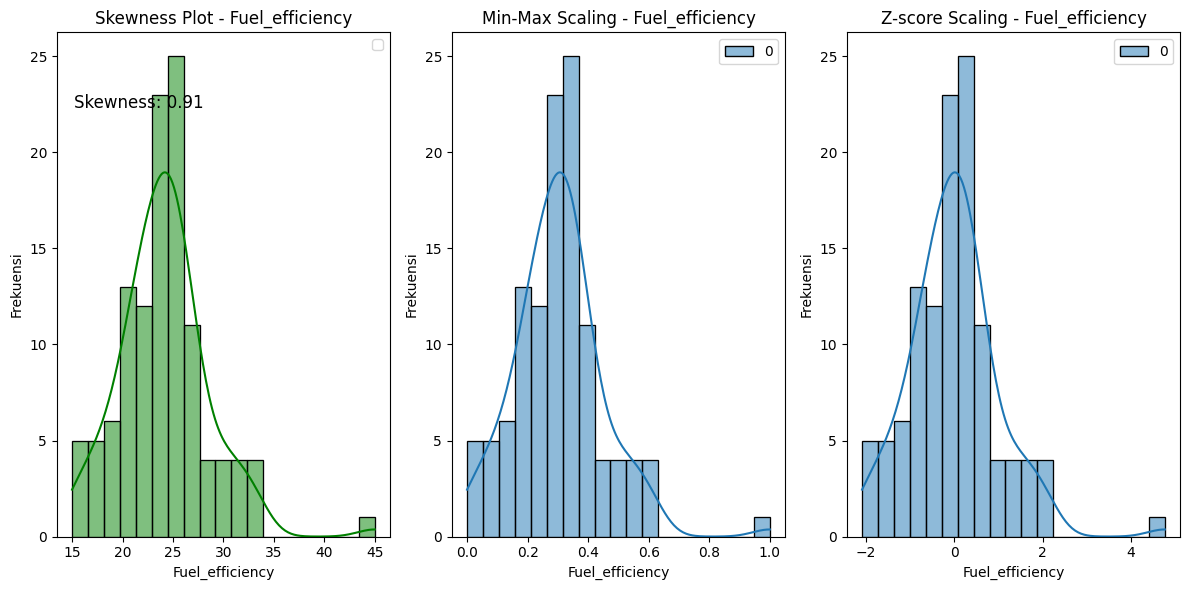

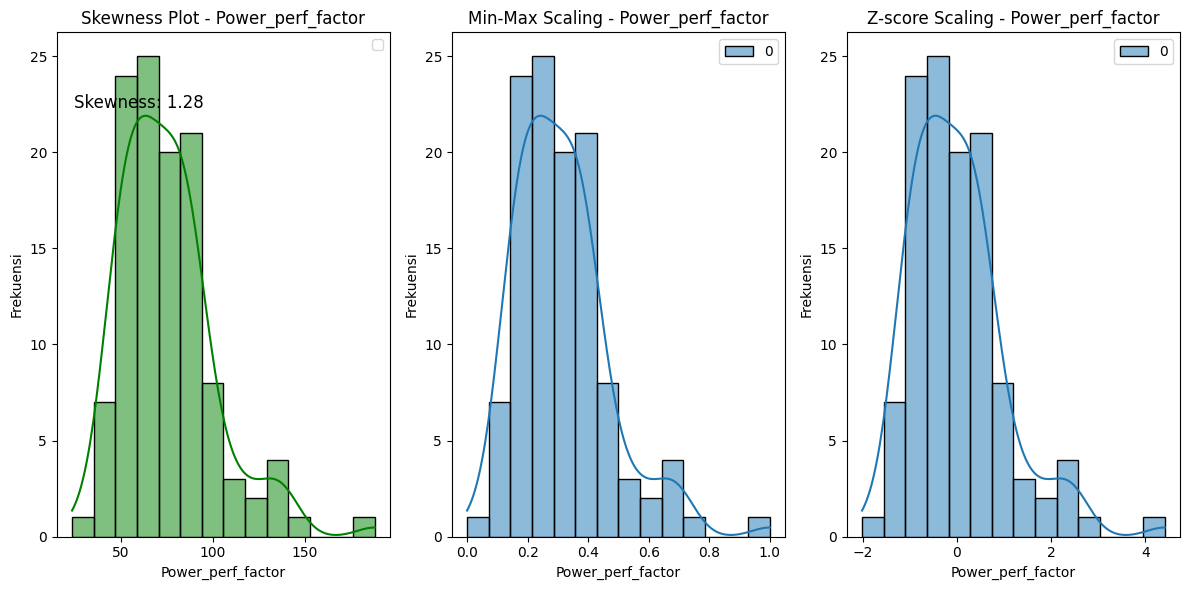

In [28]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import logging


logging.getLogger().setLevel(logging.CRITICAL)


file_path = "Car_sales.csv"
data = pd.read_csv(file_path, on_bad_lines="skip",
                     engine="python", sep=',', encoding='latin-1')
data = data.dropna()

numeric_columns = data.select_dtypes(include=[float, int]).columns


for column in numeric_columns:
   
    skewness_value = data[column].skew()


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True, color='green', edgecolor='black')
    plt.annotate(f'Skewness: {skewness_value:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)
    plt.title(f'Skewness Plot - {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')


    plt.legend()


    min_max_scaler = MinMaxScaler()
    data_min_max = min_max_scaler.fit_transform(data[[column]])


    plt.subplot(1, 3, 2)
    sns.histplot(data_min_max, kde=True, color='cyan', edgecolor='black')
    plt.title(f'Min-Max Scaling - {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

    zscore_scaler = StandardScaler()
    data_zscore = zscore_scaler.fit_transform(data[[column]])

    plt.subplot(1, 3, 3)
    sns.histplot(data_zscore, kde=True, color='orange', edgecolor='black')
    plt.title(f'Z-score Scaling - {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

Data sebelum normalisasi:
     Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0                16.919               16.360               21.50          1.8   
1                39.384               19.875               28.40          3.2   
3                 8.588               29.725               42.00          3.5   
4                20.397               22.255               23.99          1.8   
5                18.780               23.555               33.95          2.8   
..                  ...                  ...                 ...          ...   
145               9.761               11.425               14.90          2.0   
146              83.721               13.240               16.70          2.0   
147              51.102               16.725               21.20          1.8   
148               9.569               16.575               19.99          2.0   
149               5.596               13.760               17.50          2.0   

 

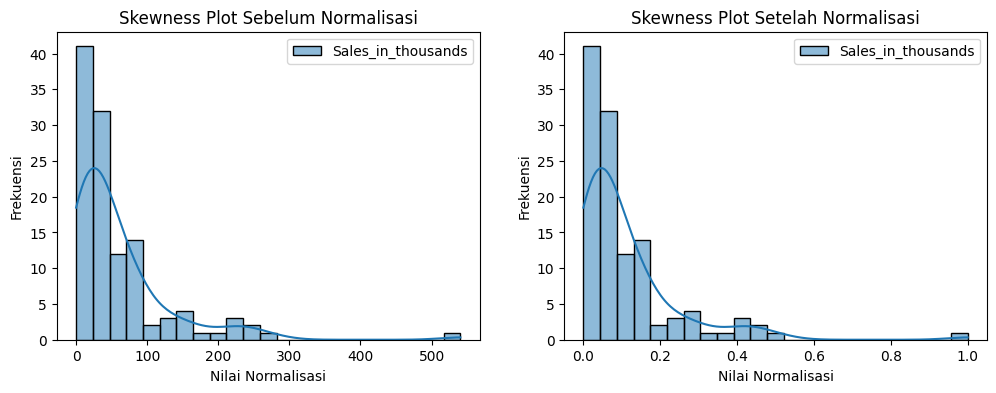

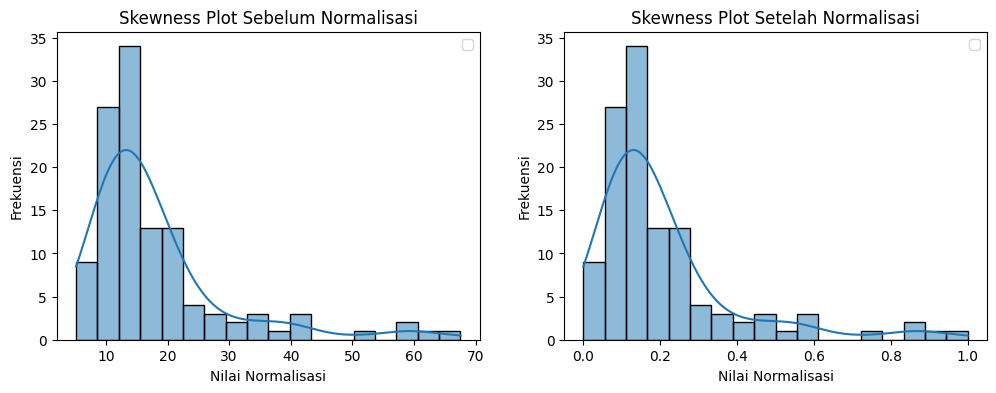

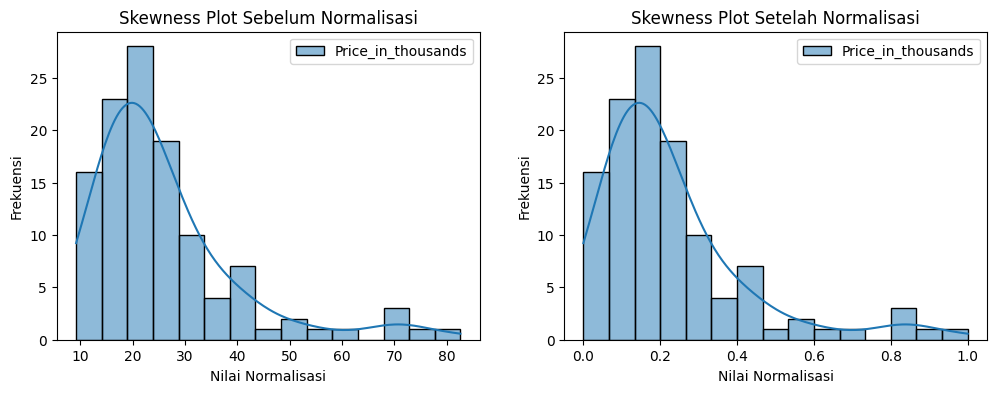

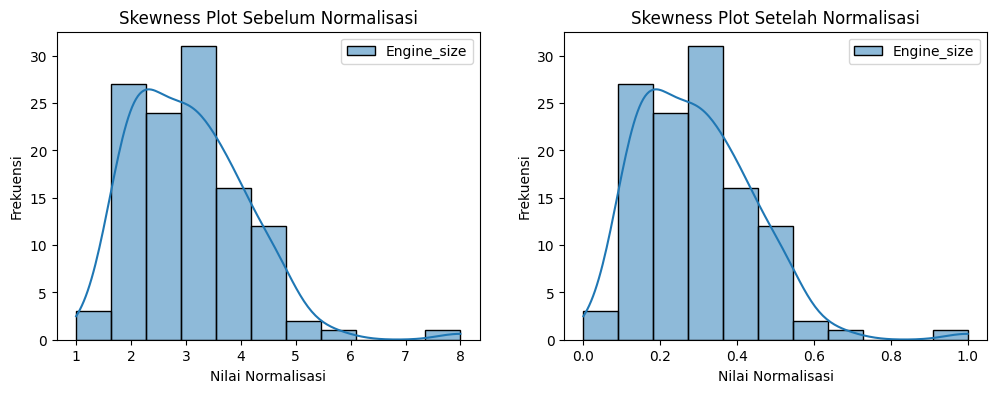

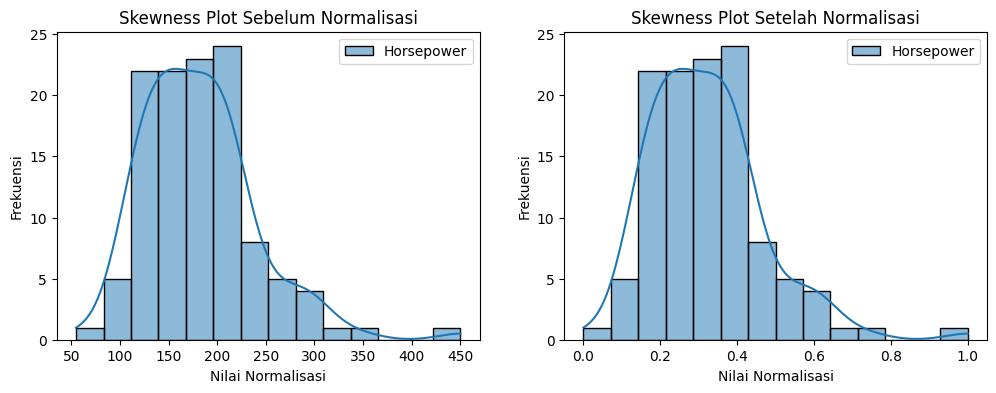

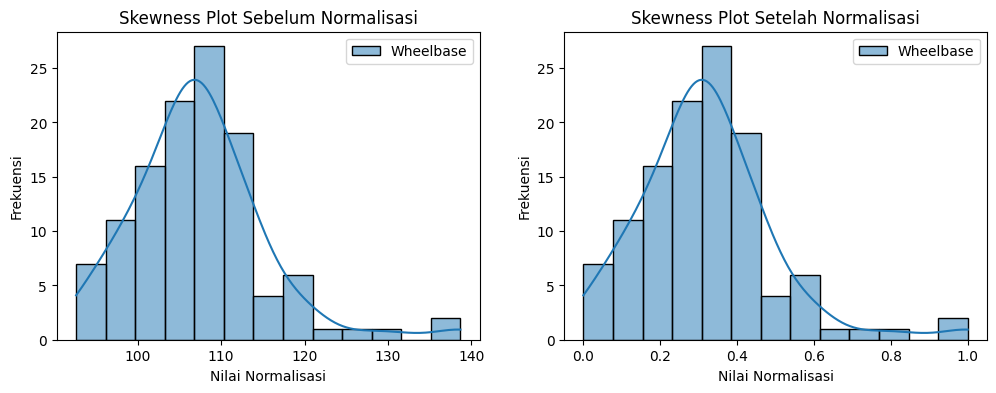

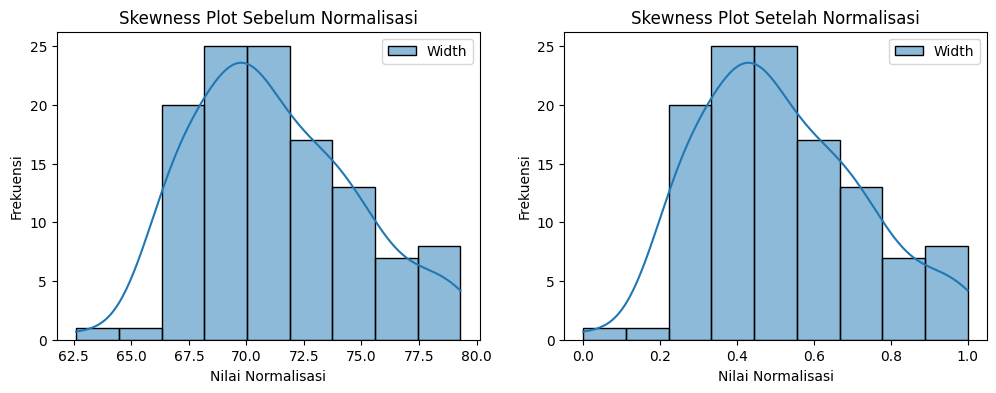

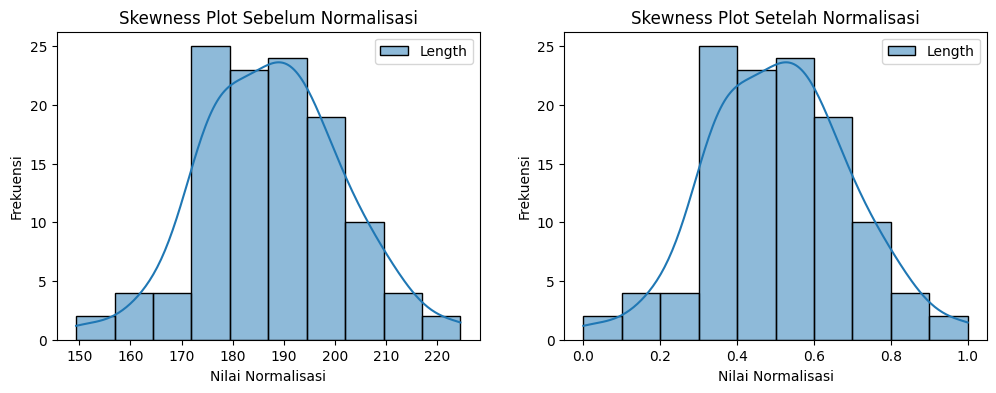

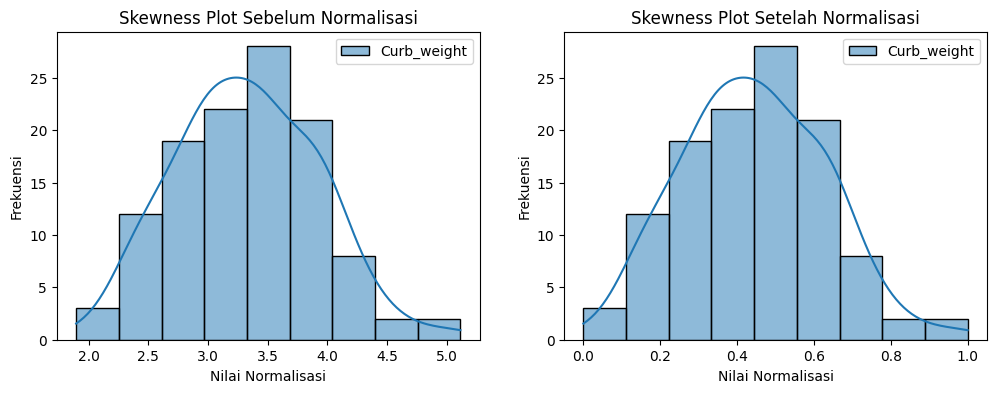

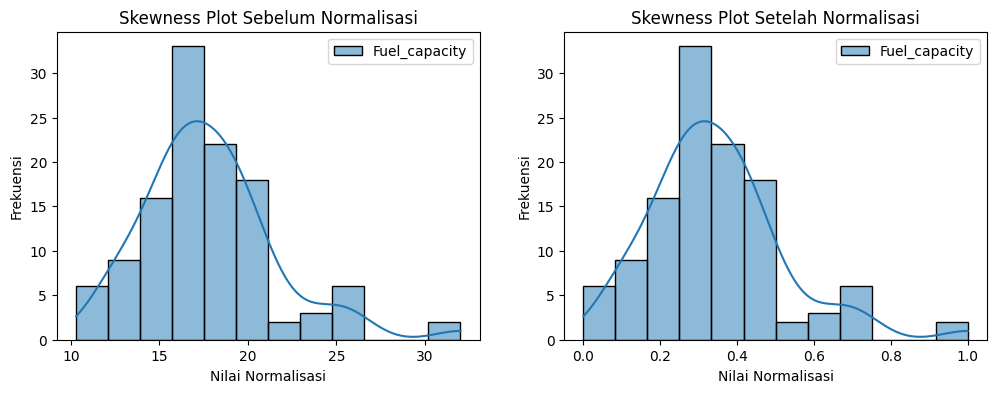

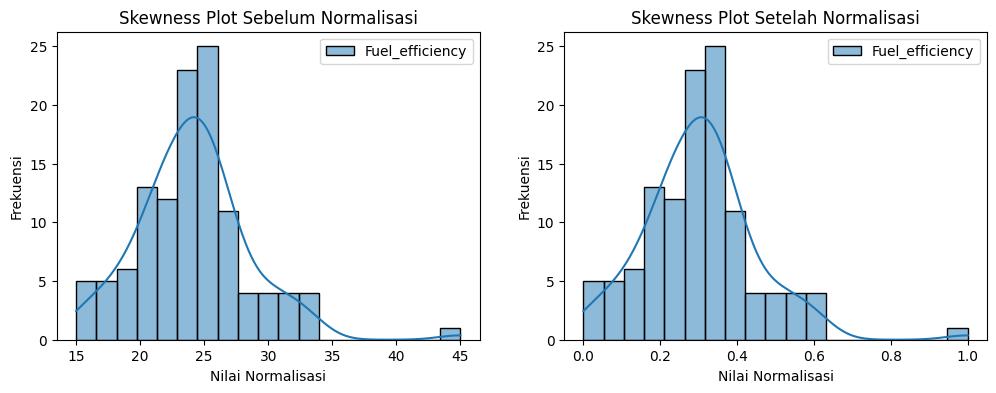

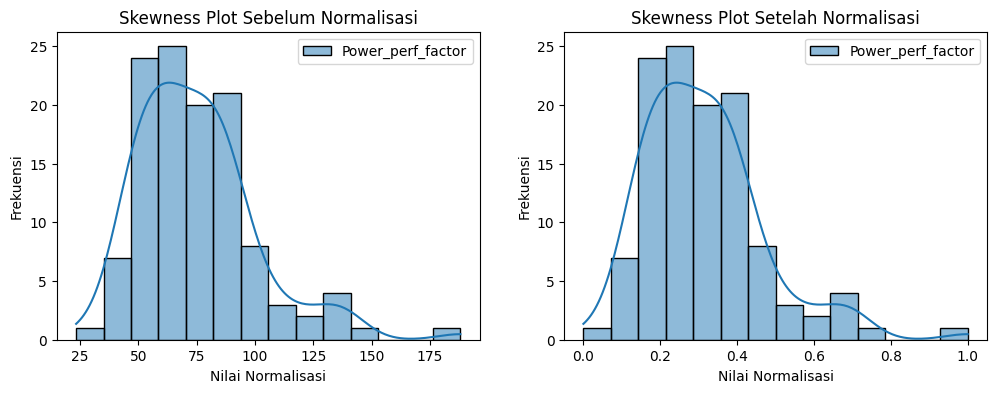

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

file_path = "Car_sales.csv"
data = pd.read_csv(file_path, on_bad_lines="skip",
                     engine="python", sep=',', encoding='latin-1')
data = data.dropna()
print("Data sebelum normalisasi:")
print(data.select_dtypes(include=[float, int]))

data = data.drop('Latest_Launch', axis=1, errors='ignore')
numeric_columns = data.select_dtypes(include=[float, int]).columns

scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)


columns_order = ['Latest_Launch'] + [col for col in data_normalized.columns if col not in ['Manufacturer', 'Vehicle_type']]
data_normalized = data_normalized[columns_order[1:]]

print("Data sesudah normalisasi:")
print(data_normalized)

for column in numeric_columns:
    if column != 'Manufacturer, Vehicle_type':
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        #fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        #data_normal = stats.boxcox(data[column])
        #sns.histplot(data_normal, label=column, kde=True, ax=axes[2])
        sns.histplot(data_normalized[column], label=column, kde=True, ax=axes[1])
        sns.histplot(data[column], label=column, kde=True, ax=axes[0])

    
    axes[1].set_title('Skewness Plot Setelah Normalisasi')
    #axes[2].set_title('Normalisasi(Box-Cox Transformation)')
    axes[0].set_title('Skewness Plot Sebelum Normalisasi')
    axes[1].set_xlabel('Nilai Normalisasi')
    axes[0].set_xlabel('Nilai Normalisasi')
    #axes[2].set_xlabel('Nilai Normalisasi')
    axes[1].set_ylabel('Frekuensi')
    axes[0].set_ylabel('Frekuensi')
   # axes[2].set_ylabel('Frekuensi')
    axes[1].legend()
    #axes[2].legend()
    axes[0].legend()
    plt.show()